In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import lmfit
from lmfit import Model

from importlib import reload

import wave8_data as wave8
reload(wave8)

sys.path.append('../')
import waveform_processing as proc
reload(proc)

<module 'waveform_processing' from '../waveform_processing.py'>

In [2]:
plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=12)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

Events read: 10054


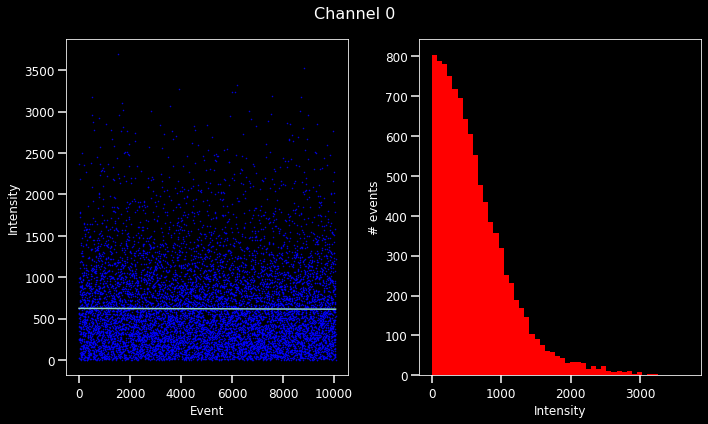

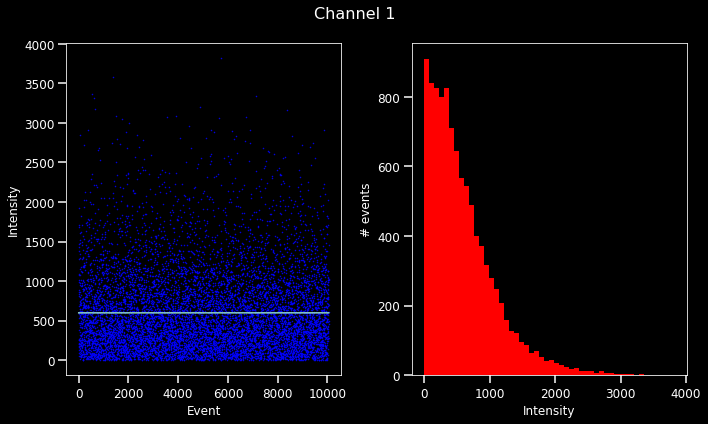

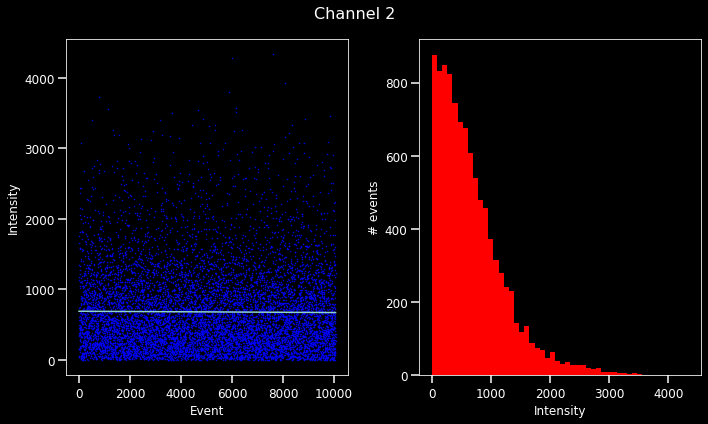

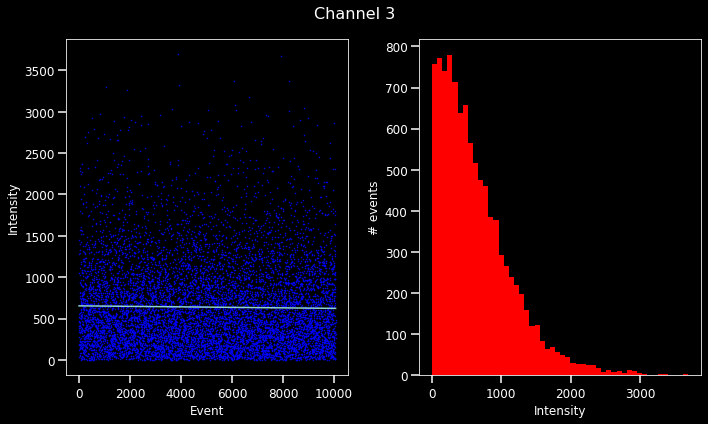

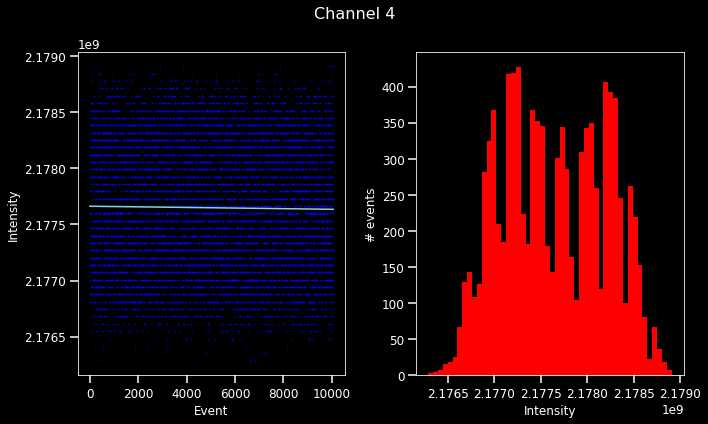

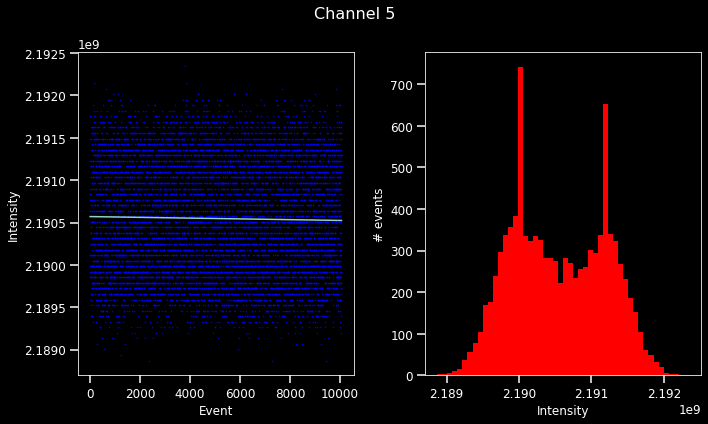

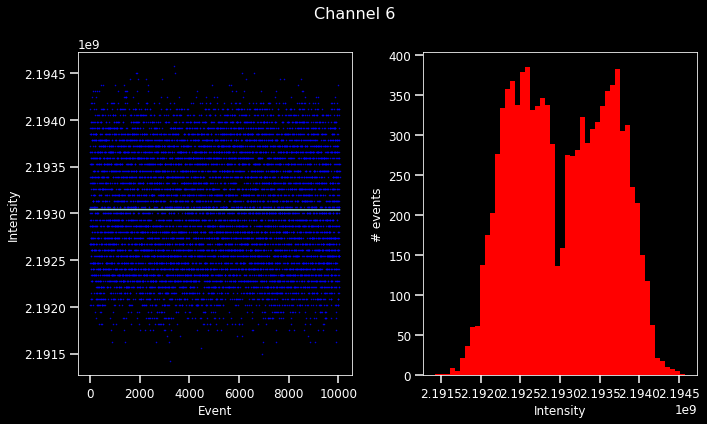

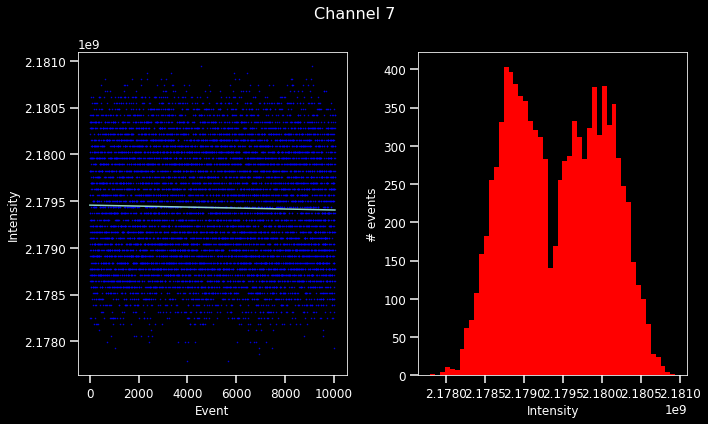

In [43]:
f = 1 # sampling (Hz)
file = Path('./data/wave8_20200720/laser_100pct.dat')
data = wave8.get_intensities(file)

channels = np.arange(8)
for chan in channels:
    yd = data[:,chan]
    xd = np.arange(yd.shape[0])/f

    fit = np.polyfit(xd, yd, 1)
    fit = np.poly1d(fit)
    yfit = fit(xd)
    yd_corr = yd-(yfit-yfit[0])



    fig, ax = plt.subplots(ncols=2, figsize=(10,6))
    fig.suptitle('Channel {}'.format(chan), fontsize=16)
    ax[0].plot(xd,yd, '.', c='b', markersize=1)
    ax[0].plot(xd,yfit)
    ax[0].set_xlabel('Event')
    ax[0].set_ylabel('Intensity')
    ax[1].hist(yd, bins=50, color='r')
#     ax[1].hist(yd_corr, bins=50, alpha=0.4, color='blue', label='with correction')
#     ax[1].legend()
    ax[1].set_xlabel('Intensity')
    ax[1].set_ylabel('# events')
    plt.tight_layout()
    fig.savefig('./figs/data_july2020_ch{}.png'.format(chan))
    plt.show()

In [29]:
file = Path('./data/20200623_6.dat')
events = wave8.file2frames(file)
wave8data = []
for event in events:
    dat = wave8.descramble_frame(event)
    wave8data.append(dat)

Events read: 46047
